In [1]:
%reload_ext autoreload
%autoreload 2


import numpy as np
import pandas as pd

from Modeling import * 

%matplotlib inline

In [174]:
model = 'Poisson-GLM'
#x=np.hstack([np.random.poisson(0.2*np.arange(0,70)+1, [1,70]) , np.random.poisson(.5*np.arange(70,150), [1,80])])
#u=np.matrix(np.arange(0,150))
t=np.arange(0,150)
u1=np.matrix(np.sin(.1*t)).transpose()
u2=np.matrix(t).transpose()
u=np.hstack([u1,u2])
x=np.vstack([np.random.poisson(3*u1[0:90,0]+0.*u2[0:90,0]+4, [90,1]) , np.random.poisson(.1*u2[90:150,0]+2, [60,1])])
x=x.transpose()[0]
K=2
C=1

print(u.shape, x.shape)
T=150
Parent= [90,0,1]
ParentTimes=Parent[0:C]
ParentRegimes=Parent[C:2*C+1]


RMF=np.zeros([K,T])
ParentTimes=np.hstack([0,ParentTimes,T])
for c in range(0,C+1):
    RMF[ParentRegimes[c],np.arange(int(ParentTimes[c]),int(ParentTimes[c+1]))]= 1

(150, 2) (150,)


In [175]:
[ModelIt(x[RMF[k]==1], u[RMF[k]==1,:],T=T,model=model) for k in range(0,K)]

c:\users\m_gor\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


[(array([ 2.98187354,  0.01391182,  3.56619574]), 192.76716908831699),
 (array([ 0.41518562,  0.11525761,  0.85467697]), 161.06763402884289)]

In [218]:
model = 'Poisson-GLM'
#x=np.hstack([np.random.poisson(0.2*np.arange(0,70)+1, [1,70]) , np.random.poisson(.5*np.arange(70,150), [1,80])])
#u=np.matrix(np.arange(0,150))
t=np.arange(0,150)
u1=np.matrix(np.sin(.1*t)).transpose()
u2=np.matrix(t).transpose()
u=np.hstack([u1,u2])
x=np.vstack([np.random.poisson(3*u1[0:90,0]+0.*u2[0:90,0]+4, [90,1]) , np.random.poisson(.1*u2[90:150,0]+2, [60,1])])
x=x.transpose()[0]
K=2
C=1

print(u.shape, x.shape)
T=150
Parent= [90,0,1]
ParentTimes=Parent[0:C]
ParentRegimes=Parent[C:2*C+1]


RMF=np.zeros([K,T])
ParentTimes=np.hstack([0,ParentTimes,T])
for c in range(0,C+1):
    RMF[ParentRegimes[c],np.arange(int(ParentTimes[c]),int(ParentTimes[c+1]))]= 1
    

#u = sm.add_constant(u, prepend=False)
#print(u.shape, x.shape)
#model_ = sm.GLM(x, u, family=sm.families.Poisson(link = sm.families.links.identity)).fit()    
#print(model_.params)
Theta=np.array([ModelIt(x[RMF[k]==1], u[RMF[k]==1,:],T=T,model=model) for k in range(0,K)])

(150, 2) (150,)


c:\users\m_gor\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


In [190]:

a= np.matrix(list(Theta[:,0]))[:,0]*u + np.matrix(list(Theta[:,0]))[:,1]

ValueError: shapes (2,1) and (150,2) not aligned: 1 (dim 1) != 150 (dim 0)

In [215]:
a = np.matrix(list(Theta[:,0]))*u.transpose()
muhat=np.multiply(a,RMF).sum(axis=0)

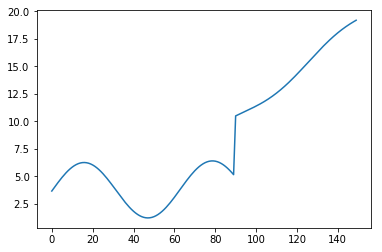

In [217]:
plt.plot(muhat.transpose())

In [53]:
model = 'Poisson-GLM'
u=np.matrix(np.arange(0,150))
u=np.matrix(np.arange(0,150))
x=np.hstack([np.random.poisson(0.2*u[0,0:70]+1, [1,70]) , np.random.poisson(.5*u[0,70:150], [1,80])])
T=x.shape[1]
K=2
C=1

Parent= [70,0,1]
ParentTimes=Parent[0:C]
ParentRegimes=Parent[C:2*C+1]
RMF=np.zeros([K,T])
ParentTimes=np.hstack([0,ParentTimes,T])
for c in range(0,C+1):
    RMF[ParentRegimes[c],np.arange(int(ParentTimes[c]),int(ParentTimes[c+1]))]= 1

In [54]:
#plt.plot(RMF.transpose())
Theta= np.array([ModelIt(x[0,RMF[k]==1], u[0,RMF[k]==1][0].transpose(),T=T,model=model) for k in range(0,K)])
Theta

c:\users\m_gor\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


array([[array([ 0.20462193,  0.61197187]), 161.99496338954253],
       [array([ 0.59344797, -9.92005224]), 274.33580434393298]], dtype=object)

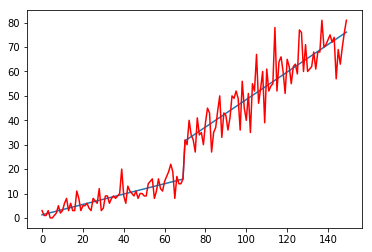

In [8]:
mu=np.matrix(list(Theta[:,0]))[:,0]*t + np.matrix(list(Theta[:,0]))[:,1]
mu1=np.multiply(mu,RMF).sum(axis=0)
plt.plot(mu1.transpose())
plt.plot(x.transpose(),'r')

In [7]:
Finalize(ParentTimes,ParentRegimes, x, t , K=K,C=C,T=T, model =model)

(1, 150)


c:\users\m_gor\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


IndexError: too many indices for array

In [ ]:
model = 'Poisson-GLM'
k=0
X=x[0,RMF[k]==1] 
U=u[0,RMF[k]==1][0].transpose()

U= sm.add_constant(U, prepend=False)
model_ = sm.GLM(X, U, family=sm.families.Poisson(link = sm.families.links.identity)).fit()

In [ ]:
T=x.shape[1]

ModelIt(x[0,RMF[k]==1],u[0,RMF[k]==1][0].transpose(),T=T,model=model)

In [13]:
x1= np.arange(0,100)#  +2*np.random.rand(40)  #,dtype = scipy.float64
x2=np.arange(200,300)
x=np.vstack([x1,x2]).transpose()
model = 'Poisson-GLM'
#x= np.arange(0,100)
y = np.random.poisson(1,100)
print(x.shape, y.shape)
x = sm.add_constant(x, prepend=False)
 #1*x1+3*x2
model_ = sm.GLM(y, x, family=sm.families.Poisson(link = sm.families.links.identity)).fit()
model_.params

(100, 2) (100,)


c:\users\m_gor\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


array([  5.55686278e-04,   4.37865497e-03,   1.91148435e-05])

In [12]:
y

109

In [ ]:
def ModelIt(x,*u,T,model):
    u=u[0]
    u = sm.add_constant(u, prepend=False)
    print(u.shape, x.shape)  #(1, 100) (100,)
    model_ = sm.GLM(x, u, family=sm.families.Poisson(link = sm.families.links.identity)).fit()
    return model_.params, -model_.llf

In [50]:
T=100
model = 'Poisson-GLM'
x1= np.arange(0,100)#  +2*np.random.rand(40)  #,dtype = scipy.float64
x2=np.arange(200,300)
x=np.vstack([x1,x2]).transpose()
y = np.random.poisson(2*x1+6*x2)
#x = sm.add_constant(x, prepend=False)
#print(x.shape, y.shape)
#model_ = sm.GLM(y, x, family=sm.families.Poisson(link = sm.families.links.identity)).fit()
#model_.params, -np.log(model_.llf)
ModelIt(y,x,T=T,model=model)

c:\users\m_gor\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


(array([ 2.00097735,  5.99764183,  0.01998332]), 499.43726126065849)

In [51]:
x.shape, y.shape

((100, 2), (100,))

In [55]:
def myfun(a,*b):
    try:
        print(b)
    except:
        print(a+b)


In [60]:
myfun(2,*u)

TypeError: myfun() argument after * must be an iterable, not bool

In [38]:
def test_var_args(f_arg, **argv):
    print ("first normal arg:", f_arg)
    for arg in argv:
        print("another arg through *argv :", arg)

test_var_args('yasoob','python','eggs','test')

TypeError: test_var_args() takes 1 positional argument but 4 were given